# **CIS 520: Machine Learning, Fall 2021**

## **K Nearest Neighbors (KNN)** 


- **Content Creator:** Hyung Seok (Paul) Roh
- **Content Reviewers:** 

The objective of this notebook is to walk through a working example of the K Nearest Neighbors (KNN) classification algorithm for the task of 
Iris classification. In the meantime, we discuss some questions that we need to pay attention to in KNN algorithm:

- What's the difference among all norm function?
- How do we pick up an optimal k values?
- What's the differences between uniform and distance weights?





In [1]:
#@markdown Tell us your thoughts about what you want to learn.
w2_upshot = '' #@param {type:"string"}
import time
try: t0;
except NameError: t0=time.time()

## **Autograding and the PennGrader**

First, you'll need to set up the PennGrader, which we'll be using throughout the semester to help you with your homeworks and worksheeets.

PennGrader is not only **awesome**, but it was built by an equally awesome person: Leo Murri.  Today, Leo works as a data scientist at Amazon!

PennGrader was developed to provide students with *instant* feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database.

### Imports and Setup (Do Not Modify This Section)

In [2]:
%%capture
!pip install penngrader

In [3]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
np.random.seed(42)  # don't change this line

import dill
import base64

In [4]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Insert PennID here!

In [5]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [6]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_K_Nearest_Neighbors_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [7]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## Setup

Now we are all done with setting up Penngrader, let's import a few common modules.

In [8]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

## **Norm**

In KNN algorithm, we need to calculate the distances between data points. We already learnt the concepts of norms in the lecture. Let's use real dataset to calculate norms and understand the different effects of various norms in the process of selecting nearest neighbors.

In [9]:
# load the Iris dataset
iris = datasets.load_iris()

# In order to visualize datapoints easily, we only take the first two features. 
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal width')

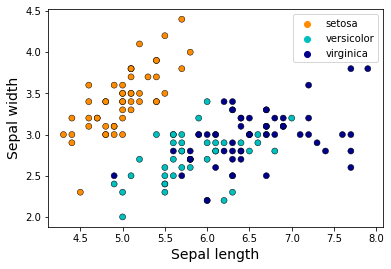

In [10]:
cmap_bold = ['darkorange', 'c', 'darkblue']
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)

## *Question 1*

Each norm generates a distance. And different distances give different decision boundaries. Given the randomly sampled 20 elements in the Iris dataset, calculate the  $L_1$, $L_2$ and $L_{inf}$ for each pair, repectively.

*Hint: The example code of $L_0$ is provided. Feel free to make any modifications if you need.*

In [11]:
# sample 20 points - Do not modify this part of the code (need fixed random seed)
sample_size = 20
np.random.seed(43)
indices = np.random.randint(X.shape[0], size = sample_size)
data = X[indices]
target = y[indices]

Text(0, 0.5, 'Sepal width')

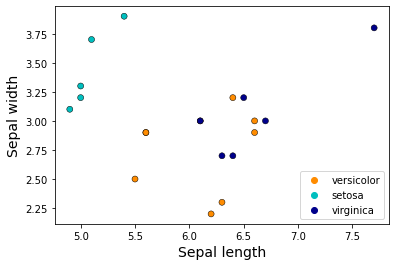

In [12]:
# visualize samples
cmap_bold = ['darkorange', 'c', 'darkblue']
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=iris.target_names[target],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)

In [13]:
#### Example L0 Norm ####
def l0_norm(point1, point2):
    diff = point1 - point2
    return np.count_nonzero(diff)

### L1 Norm

In [14]:
#### ToDo: complete norm functions here####
def l1_norm(point1, point2):
  diff = np.abs(point1 - point2)
  return np.sum(diff)


### L2 Norm

In [15]:
#### ToDo: complete norm functions here####
def l2_norm(point1, point2):
  diff = np.square(point1-point2)
  return np.sqrt(np.sum(diff))


### L inf Norm

In [68]:
#### ToDo: complete norm functions here####
def linf_norm(point1, point2):
  inf = np.inf
  diff = np.power(np.abs(point1-point2), inf)
  return np.power(np.sum(diff), 1/inf)



## Distance Matrix

Now that we have set up the Norm Functions, lets create the distance matrixes for all norm functions.

Example using L0 norm is given below

In [69]:
dis_mat = np.zeros((sample_size, sample_size))
for i in range(sample_size): 
    for j in range(sample_size):
        #### Example of filling L0 Distance Matrix ####
        dis_mat[i][j] = l0_norm(data[i], data[j])

### L1, L2, L inf Norm

In [70]:
## TODO: Create Distance Matrix for L1, L2, L inf Norms ##
dis_mat_l1 = np.zeros((sample_size, sample_size))
dis_mat_l2 = np.zeros((sample_size, sample_size))
dis_mat_linf = np.zeros((sample_size, sample_size))

for i in range(sample_size): 
    for j in range(sample_size):
        dis_mat_l1[i][j] = l1_norm(data[i], data[j])
        dis_mat_l2[i][j] = l2_norm(data[i], data[j])
        dis_mat_linf[i][j] = linf_norm(data[i], data[j])

*Extra task: we run two for-loop to calculate the distance matrix. Could you use vectorization methods to accelerate this calculation?*

## *Question 2*

Since you already have the distance matrix, it is easy for you to find the nearest neighbors. 

Please find the top 5 nearest neighbors for point (6.2, 2.2) using various norms and analyze the result. 

You may want to check the contents of 20 datapoints we sampled to find where (6.2, 2.2) is located

Also check out np.argsort() documentation to get the nearest points

### L1 Norm

Get index number of 5 nearest neighbors for L1 Norm

In [71]:
# TODO

a = [6.2, 2.2]
l1_dist = [l1_norm(i,a) for i in data]
l1_5nearest_indices = np.argsort(l1_dist)[0:5]

In [72]:
l1_dist

[0.0,
 1.3000000000000003,
 2.3,
 2.6000000000000005,
 1.0999999999999992,
 2.4999999999999996,
 1.2000000000000002,
 1.2999999999999998,
 0.9000000000000004,
 1.2999999999999998,
 0.1999999999999993,
 1.3000000000000003,
 2.2,
 0.9000000000000004,
 0.5999999999999996,
 1.0,
 0.7000000000000002,
 2.1999999999999997,
 1.1999999999999993,
 3.0999999999999996]

In [73]:
l1_5nearest_indices

array([ 0, 10, 14, 16, 13])

In [74]:
grader.grade(test_case_id = 'test_case_q2_l1_5nearest_indices', answer = l1_5nearest_indices)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


List of 5 nearest neigbors for (6.2, 2.2) using L1 Norm

In [75]:
# TODO
l1_5nearest_datapoints = np.zeros([5, 2])

for i in range(5):
  l1_5nearest_datapoints[i] = data[l1_5nearest_indices[i]]

In [76]:
l1_5nearest_datapoints

array([[6.2, 2.2],
       [6.3, 2.3],
       [6.3, 2.7],
       [6.4, 2.7],
       [6.1, 3. ]])

In [77]:
grader.grade(test_case_id = 'test_case_q2_l1_5nearest_datapoints', answer = l1_5nearest_datapoints)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### L2 Norm

Get index number of 5 nearest neighbors for L2 Norm

In [78]:
# TODO

a = [6.2, 2.2]
l2_dist = [l2_norm(i,a) for i in data]
l2_5nearest_indices = np.argsort(l2_dist)[0:5]

In [79]:
l2_5nearest_indices

array([ 0, 10, 14, 16, 15])

In [80]:
grader.grade(test_case_id = 'test_case_q2_l2_5nearest_indices', answer = l2_5nearest_indices)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


List of 5 nearest neigbors for (6.2, 2.2) using L2 Norm

In [81]:
# TODO
l2_5nearest_datapoints = np.zeros([5, 2])

for i in range(5):
  l2_5nearest_datapoints[i] = data[l2_5nearest_indices[i]]

In [82]:
l2_5nearest_datapoints

array([[6.2, 2.2],
       [6.3, 2.3],
       [6.3, 2.7],
       [6.4, 2.7],
       [5.5, 2.5]])

In [83]:
grader.grade(test_case_id = 'test_case_q2_l2_5nearest_datapoints', answer = l2_5nearest_datapoints)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### L inf Norm

Get index number of 5 nearest neighbors for L inf Norm

In [84]:
# TODO

a = [6.2, 2.2]
linf_dist = [linf_norm(i,a) for i in data]
linf_5nearest_indices = np.argsort(linf_dist)[0:5]

In [85]:
linf_5nearest_indices

array([ 0, 17, 16, 15, 14])

In [86]:
grader.grade(test_case_id = 'test_case_q2_linf_5nearest_indices', answer = linf_5nearest_indices)

You earned 0.8/1.0 points.

But, don't worry you can re-submit and we will keep only your latest score.


List of 5 nearest neigbors for (6.2, 2.2) using L inf Norm

In [87]:
# TODO
linf_5nearest_datapoints = np.zeros([5, 2])

for i in range(5):
  linf_5nearest_datapoints[i] = data[linf_5nearest_indices[i]]

In [88]:
linf_5nearest_datapoints

array([[6.2, 2.2],
       [4.9, 3.1],
       [6.4, 2.7],
       [5.5, 2.5],
       [6.3, 2.7]])

In [89]:
grader.grade(test_case_id = 'test_case_q2_linf_5nearest_datapoints', answer = linf_5nearest_datapoints)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **K selection**

The number of nearest neighbors, which is usually represented by *k* is another important hyper-parameter we need to consider before training.

Here we use the same sample data to understand why *k* really matters in KNN. 

## *Question 3*

For point (6.3, 2.3), please select top 3,5,8,10 nearest neighbors and find their corresponding labels (L2 norm).

3, 5, 8, 19 nearest negihbors list from (6.3, 2.3) using L2 Norm

---
Labels of these datapoints (in repective order)


In [101]:
# TODO
q3_list = [3, 5, 8, 10]
q3_nearest_datapoints = np.zeros([4, 2])
q3_nearest_labels = np.zeros([4], dtype = np.int8)
a = [6.3, 2.3]

for i in range(4):
  l2_dist = [l2_norm(j,a) for j in data]
  q3_nearest_indices = np.argsort(l2_dist)[0:q3_list[i]]
  q3_nearest_datapoints[i] = data[q3_nearest_indices[-1]]
  q3_nearest_labels[i] = target[q3_nearest_indices[-1]]

In [102]:
q3_nearest_datapoints

array([[6.3, 2.7],
       [6.6, 2.9],
       [6.6, 3. ],
       [5.5, 2.5]])

In [103]:
q3_nearest_labels

array([2, 1, 1, 1], dtype=int8)

In [104]:
grader.grade(test_case_id = 'test_case_q3_nearest_datapoints', answer = q3_nearest_datapoints)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [105]:
grader.grade(test_case_id = 'test_case_q3_nearest_labels', answer = q3_nearest_labels)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Case Study**

We still use Iris dataset to run KNN. 


### Step 1: Data preparation

We need to split the original dataset into train, validation and test data.

In [106]:
# load the Iris dataset
iris = datasets.load_iris()

(X_train, X_test, y_train, y_test) = train_test_split(np.array(iris.data[:,:2]),
iris.target, test_size=0.30, random_state=42)


(X_test, X_val, y_test, y_val) = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

# show the sizes of each data split

print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
print("testing data points: {}".format(len(y_test)))


training data points: 105
validation data points: 23
testing data points: 22


### Step 2: Training

We will use sklearn's KNeighborsClassifier for training. Let us use different values of *k* to gain some insights. 

First, evaluate the accuracy on the validation dataset

In [124]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
k_values = range(1, 30, 2)
val_accuracies = []

## TODO - Fill the Blanks
# loop over various values of `k` for the k-Nearest Neighbor classifier (Validation Dataset)
for k in range(1, 30, 2):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  score = model.score(X_val, y_val)
  val_accuracies.append(score)

### Step 3: Hyper-parameter Tuning 

We can visualize how the validation accuracy changes along with the increase of *k*.

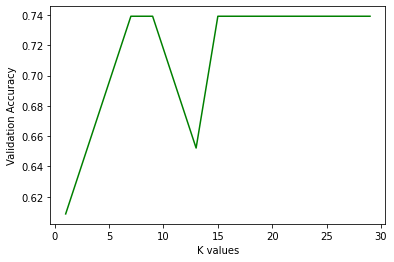

In [125]:
plt.plot(k_values, val_accuracies, color='g')
plt.xlabel("K values")
plt.ylabel("Validation Accuracy")
plt.show()

## *Question 4*

- Can you explain the trend in the Validation Accuracy plot? 

- Looking at the Validation Accuracy plot, which optimal value of k should be chosen? (Remember, the running time of KNN increases with larger values of k. Also very low value of k are prone to overfitting)

In [130]:
# TODO
optimal_k = 15

In [131]:
grader.grade(test_case_id = 'test_case_q4_optimal_k', answer = optimal_k)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### Weights Parameter



In addition to `n_neighbors`, there is another parameter - `weights` we need to pay attention to. See [document](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) here to understand the functionality of `weights`.

Also check the accuracies on the Validation Dataset

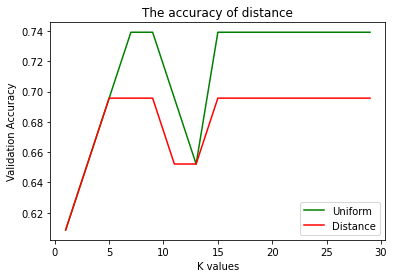

In [133]:
# we try different weights to see whether there is big difference
k_values = range(1, 30, 2)
accuracies = []

## TODO - Fill the Blanks
for weights in ['uniform', 'distance']:
    for k in range(1, 30, 2):
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors = k, weights=weights)
        clf.fit(X_train, y_train)
        # evaluate the model on validation set
        score = clf.score(X_val, y_val)
        accuracies.append(score)
    
plt.plot(k_values, accuracies[:15], color='g', label='Uniform')
plt.plot(k_values, accuracies[15:], color='r', label = 'Distance')
plt.xlabel("K values")
plt.ylabel("Validation Accuracy")
plt.title("The accuracy of "+ weights)
plt.legend()
plt.show()

## *Question 5*

Describe the above figure and analyze the difference between uniform weights and distance weights. Why do these differences exist?

Write your thoughts as a string in the below variable. (We wouldn't be grading on the content, just asking you to write your thoughts. We would be checking for empty answers.) 

In [134]:
# TODO
q5_answer = 'K-NN is a model that defines boundaries based on the similarity of data points with other data points. Distance or L2 norm is only one of the form of similarity finding. Hence, it is completely possible, that under Uniform weights of possibly an optimal self defined norm, the boundaries might be better defined, leading to higher accuracies.'

In [135]:
grader.grade(test_case_id = 'test_case_q5', answer = q5_answer)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### Step 4: Evaluation

Please retrain the KNN model with your chosen value of `n_neighbors` and `weights` reevaluate the selected classifier on the test dataset. 

In [137]:
#### To Do: define your optimal k value and the chosen metric here ####
optimal_k = 15  # should be an integer
chosen_metric = l2_norm   # l0_norm or your other norm functions, you can choose any
weights = 'uniform'  # 'uniform' or 'distance'

####
model = KNeighborsClassifier(n_neighbors=optimal_k, weights = weights)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))
print("Accuracy: " + str(accuracy_score(y_test, predictions)))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.33      0.33      0.33         3
           2       0.67      0.67      0.67         6

    accuracy                           0.82        22
   macro avg       0.67      0.67      0.67        22
weighted avg       0.82      0.82      0.82        22

Accuracy: 0.8181818181818182


## Submitting to the Autograder

First of all, please run your notebook from beginning to end and ensure you are getting all the points from the autograder!

Now go to the File menu and choose "Download .ipynb".  Go to [Gradescope](https://www.gradescope.com/courses/409970) and:

1. From "File" --> Download both .ipynb and .py files
1. Name these files `K_Nearest_Neighbors_WS.ipynb` and `K_Nearest_Neighbors_WS.py` respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and ensure  your class is "CIS 5200"
1. Select **Worksheet: K Nearest Neighbors**
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

You should be set! Note that this assignment has 10 autograded points that will show up upon submission. Points are awarded based on a combination of correctness and sufficient effort. 